/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

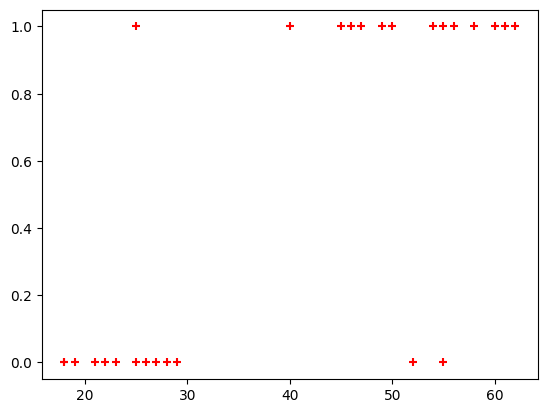

In [ ]:
# -*- coding: utf-8 -*-
"""LogisticRegression_Binary.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1M8PXdcmPsrQtqyVXpET3sgghAMr_MCg5
"""

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.

df = pd.read_csv("/content/insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


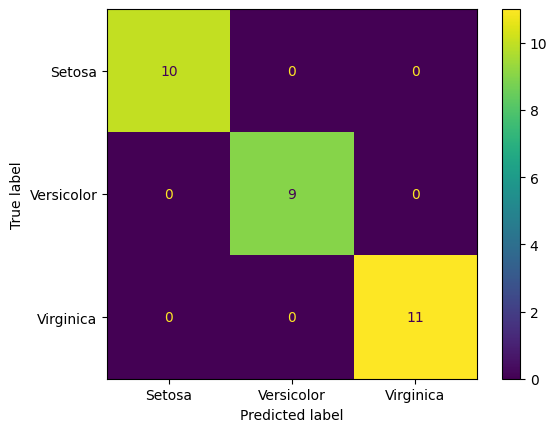

In [ ]:
# -*- coding: utf-8 -*-
"""LogisticRegression_Multiclass.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1anBybVXILenh0a_R4aM_ZemLrEqYWnJl
"""

# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the Iris dataset
iris =  pd.read_csv("/content/iris.csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

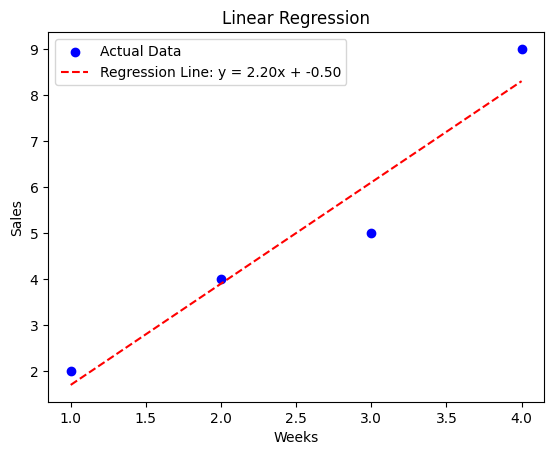

Linear Regression Equation: y = 2.20x + -0.50
Enter number of weeks: 5
Predicted sales for 5.0 weeks: 10.50


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
 # User input for file path
df = pd.read_csv("/content/data.csv")

# Extract features and target variable
X = df[['weeks']].values  # Independent variable
y = df['sales'].values    # Dependent variable

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Predict y values
y_pred = model.predict(X)

# Plot the data points and regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linestyle='--', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print equation
print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")

# User input for prediction
week_input = float(input("Enter number of weeks: "))
sales_output = model.predict([[week_input]])[0]
print(f"Predicted sales for {week_input} weeks: {sales_output:.2f}")

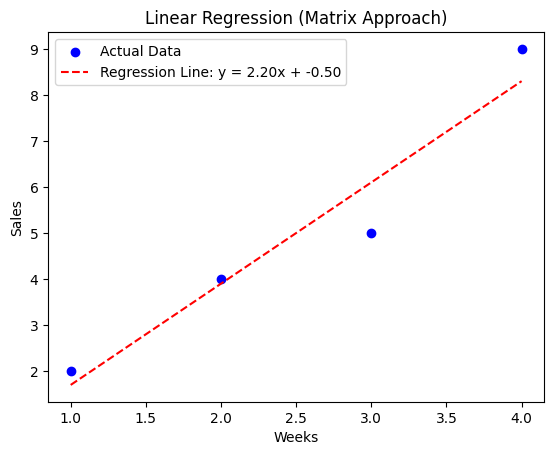

Linear Regression Equation: y = 2.20x + -0.50
Enter number of weeks: 7
Predicted sales for 7.0 weeks: 14.90


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
 # User input for file path
df = pd.read_csv("/content/data.csv")

# Extract features and target variable
X = df[['weeks']].values  # Independent variable
y = df['sales'].values    # Dependent variable

# Matrix approach to Linear Regression
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Predict y values
y_pred = X_b @ theta_best

# Plot the data points and regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linestyle='--', label=f'Regression Line: y = {theta_best[1]:.2f}x + {theta_best[0]:.2f}')
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.title('Linear Regression (Matrix Approach)')
plt.legend()
plt.show()

# Print equation
print(f"Linear Regression Equation: y = {theta_best[1]:.2f}x + {theta_best[0]:.2f}")

# User input for prediction
def predict_sales(week):
    return np.array([1, week]) @ theta_best

week_input = float(input("Enter number of weeks: "))
sales_output = predict_sales(week_input)
print(f"Predicted sales for {week_input} weeks: {sales_output:.2f}")
